# Introduction

blabla


# Equations:

- Kreis, negatives y2, class 1:<br/> 
(x^2 - y^2 = 1), "periodisch gemacht" mit sin/cos <br/> <br/> 
- Kreis, quadriert, class 2:<br/> 
(x^2 + y^2)^2 = 1, "periodisch gemacht" mit sin/cos<br/> <br/> 
- Lemniskate, class 3:<br/> 
((x^2 + y^2)^2 - 2*(x^2 - y^2)) = 0, a=1, "periodisch gemacht" mit sin/cos. Ist quasi differenz  von Kreis mit negativem y und quadriertem Kreis ; sieht man im Graph <br/> <br/> 
- einfache sum sin/cos, class 4:<br/> 
cox(x) + sin(x)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Helper functions

In [2]:
def get_date():
    """
    get the todays date
    :return:  todays date (string)
    """
    from datetime import date
    today = str(date.today())

    return today

def subdirectory(current, new):
    """
    :param new:     name of the new subdirectory of the current one, a new one is only created, if it does not
                    already exist
    """

    script_dir = os.path.dirname('current')
    new_dir = os.path.join(script_dir, new + '/')

    if not os.path.isdir(new_dir):
        os.makedirs(new_dir)
        
        
def equation_1(discr, a,b,s,t):
    return  np.array([[(np.sin(s*(x-a)**2 - t*(y-b)**2))for y in discr] for x in discr])  
     

def equation_2(discr, a,b,s,t):    
    return np.array([[(np.sin(s*(x-a)**2 + t*(y-b)**2)**2)for y in discr] for x in discr])

def equation_3(discr, a,b,s,t):
    return np.array([[np.sin(s*((x-a)**2 + (y-b)**2))**2 - np.cos(t*((x-a)**2 - (y-b)**2))for y in discr] for x in discr])

def equation_4(discr, a,b,s,t):
    return np.array([[(np.cos(s*(x-a)) + np.sin(t*(y-b))) for y in discr] for x in discr])

        
def equation_to_df(equation, m, save_as_csv, name_df, clas):
    
    #list for saving the arrays
    lst_pic = []
    lst_class = []
    lst_a = []
    lst_b = []
    lst_s = []
    lst_t = []


    for i in range(0,m):

        pic =  equation(discr, a[i], b[i], s[i], t[i])  

        lst_pic.append(pic)
        lst_class.append(clas)
        lst_a.append(a[i])
        lst_b.append(b[i])
        lst_s.append(s[i]) 
        lst_t.append(t[i])    
        

    #creating an 3dim array holding the generated images along the  axis = 0    
    arr_pic = np.array(lst_pic) 
    print(arr_pic.shape) 


    #storage of the lists in a pandas table
    df = pandas_params(lst_pic, lst_class, lst_a, lst_b, lst_s, lst_t)
    
    if save_as_csv:
        df.to_csv(name_df)
   
    return df, arr_pic


def plot_function(df, name_df, file, save_plot, color):
    
    #images (column 'pic' in table) --> 3d array 
    arr_pic = column_to_array(df, string = 'pic') 

    #classes, lables (column 'class' in table--> 1d array
    arr_class = column_to_array(df, string = 'class')   

    #param a:
    arr_a = column_to_array(df, string = 'a')
    #param a:
    arr_b = column_to_array(df, string = 'b')
    #param a:
    arr_s = column_to_array(df, string = 's')
    #param a:
    arr_t = column_to_array(df, string = 't')
    
    #extract indices of rows as a list
    lst_index =  df.index.tolist()
    
    
    for i in range (len(lst_index)):
    
         #title defintion depending on class
        if arr_class[i] == 1:
            title = 'circle, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                          np.round(arr_a[i], 2), 
                                                                          np.round(arr_b[i], 2),
                                                                          np.round(arr_s[i], 2),
                                                                          np.round(arr_t[i], 2))
        elif arr_class[i] == 2:
            title = 'circle squared, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i],
                                                                                  np.round(arr_a[i], 2), 
                                                                                  np.round(arr_b[i], 2),
                                                                                  np.round(arr_s[i], 2),
                                                                                  np.round(arr_t[i], 2))
        elif arr_class[i] == 3:
            title = 'lemniskate, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                              np.round(arr_a[i], 2), 
                                                                              np.round(arr_b[i], 2),
                                                                              np.round(arr_s[i], 2),
                                                                              np.round(arr_t[i], 2))
        elif arr_class[i] == 4:
            title = 'sin cos, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                           np.round(arr_a[i], 2), 
                                                                           np.round(arr_b[i], 2),
                                                                           np.round(arr_s[i], 2),
                                                                           np.round(arr_t[i], 2))                                                                  

        fig, ax = plt.subplots(ncols=1,  figsize=(16 ,4))

        pos1 = ax.imshow(arr_pic[i],color)
        ax.set_title(title)
        fig.colorbar(pos1, ax=ax)
        
        if save_plot:
            # create new subdirectory name, function subdirectory creates that subdirectory if it does not already
            # exist
            new = 'plots random samples '
            subdirectory(file, new)
            plt.savefig(new + '/{}_{}_{}.png'.format(get_date(), name_df, lst_index[i], bbox_inches="tight"))
            

    return fig


def plot_function_4(lst_pic, lst_title, lst_color):
    fig, ax = plt.subplots(ncols=4,  figsize=(16 ,4))
    
    for i in range(4):
        pos1 = ax[i].imshow(lst_pic[i], lst_color[i])
        ax[i].set_title(lst_title[i])
        fig.colorbar(pos1, ax=ax[i])
        
    return fig  


def pandas(lst_pic, lst_class):

    data = {'pic': lst_pic, 'class': lst_class}
    df = pd.DataFrame(data=data)
    
    return df 


def pandas_params(lst_pic, lst_class, lst_a, lst_b, lst_s, lst_t ):

    data = {'pic': lst_pic,
            'class': lst_class,
            'a': lst_a,
            'b': lst_b,
            's': lst_s,
            't': lst_t,}
    
    df = pd.DataFrame(data=data)
    
    return df 


def column_to_array(df, string): 
    
    #extract colon 'pic' as an array 
    arr = df[[string]].to_numpy()
    
    #fill the elements (2dim arrays of selected images) in a list and transform the list in an array    
    lst = []
    for item in arr:
        lst.append(item[0])

    arr= np.array(lst)  
    
    return arr

# Block 1: Definition of the "canvas"

In [3]:
# Block1: Definition of the "canvas" 

# number of pixels in one dimension, total nunber of pixels is (n_pix_x)^2
n_pix_x = 100

#returns n_pix_x equally spaced samples in the intervall:
discr = np.linspace(0, 19, n_pix_x)  

# Block 2: Definition of the equations

blabla

Grundmuster, ohne Parameter

- Block 2a: Definition of the equations
- Block 2b: Plot of the equations on the "canvas" 

In [4]:
#Block 2a: 4 equations: (ohne parameters), welche verschiedene Grundmuster erzeugen

#Kreis, negativer y term:
pic1 =  np.array([[(np.sin(x**2 - y**2))for y in discr] for x in discr])

#Kreis, quadriert:
pic2 = np.array([[(np.sin(x**2 + y**2)**2)for y in discr] for x in discr])

#Lemniskate (Kombination Kreis quadiert und Kreis mit negativem y term):
#ACHTUNG: Original Lemniskate hat einen factor vor dem zweiten Term (2a), bei a+1 also 2, hier 1:
pic3 = np.array([[np.sin((x)**2 + (y)**2)**2 - np.cos(1*((x)**2 - (y)**2))for y in discr] for x in discr])

#Sum sin und cos:
pic4 = np.array([[(np.cos(x) + np.sin(y)) for y in discr] for x in discr])

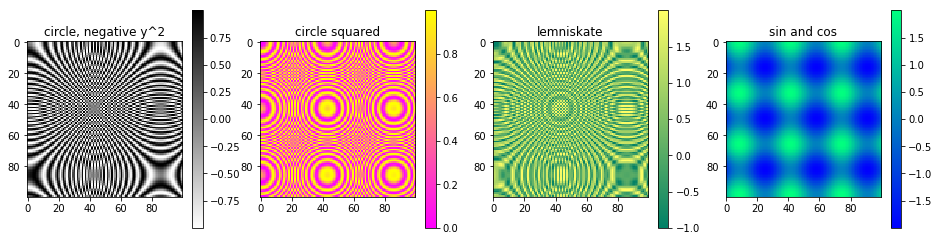

In [5]:
#Block 2b: Plot of the four defined equations

lst_pic = [pic1, pic2, pic3, pic4]
lst_title = ['circle, negative y^2', 'circle squared', 'lemniskate', 'sin and cos']
lst_color = ['binary', 'spring', 'summer', 'winter']

fig = plot_function_4(lst_pic, lst_title, lst_color)

# Block 3: Parameterisation for generating different images

Two kinds of parameters: 

- additive: (x + a), (y + b); a,b = floats from {- n to + n}
- multiplicative: s*(x), t*(y); s,t  = floats from { not zero to to m } , from not zero to not one it is an division!
with latex nicer mathematical descriprtion of the parameter space!

a lot of combinations possible! 

- only for x, only for y or both,
- only multiplicative,
- only additive
- cross versions (additive for x, multiplicative for y)
- etc.

Each parameter setting for each equation generates an 2 dim np.array holding the pixel values (the image). The results (2dim arrays) for an equation with paramerters scrolling through their defintion space are stored in a list ("lst_picx"). This list is translated in a 3 dim np.array. The lists are stored in a pandas table for later use if a CNN is to be trained and the class label to each image is needed.

**Block 3a: Parameter Definition**

Please define each of the parameters a,b,s and t. If you would like, that one ore more
of these parameters stay "silent" (do not influense, stay neutral) define

 - additive (a and b): as 0
 - multiplicative (s and t) : as 1
 
Choose the corresponding blocks below. You can choose fixed parameters (they do not change for the images) or running
parameters (they change by a defined increment form one to the other image). For example you can choose 3 parameters 
stay fixed (or silent, if 0 or 1) and let run the forth parameter. This allow a lot of combinations!!

- Block 3a0: Definition of the parameter range
- Blocks 3a1-4: Definition of the fixed parameters
- Blocks 3a5-8: Definition of the running paramters

Please make sure, that ALL the parameters (a,b,s,t) are defined either fixed/silent or running, otherwise later errors will be produced. Be aware of overwriting. e.g.if you decide to use only additive parameter (--> s and t should be set to 1 in the block 3a3/3a4). If you then by mistake define s/t in the running blocks 3a7/3a8 again, the fixed values are overwritten, because the variable name is the same.

Workflow: 

- define the params as described above
- use them for an equation --> store the results in a pandas dataframe (table)
- use the same parameters for another equation --> store the results in a pandas dataframe (table)
- or change the parameter for the same equation --> store the results in a pandas dataframe (table)

Once you have all the tables you can do what ever you want with the tables (combine, scramble, take selective rows to plot, samples etc.) All infos (the images (x,y values), the class (which equation), the params used to generate the image) are stored. 

A dataframe (table) can easily be saved as a csv file. The csv files are stored in the current working directory. Please note that a dataframes with the same name (which you have to specify) are overwritten. Thats what the 1 in the end of the name "dfx_1" is for. The next run for the same equation with other params should be stored under another name "df1_2". To read the data back is also easy, see block 6f.

In [6]:
#Block 3a0: Definition of the parameter range, how many samples of images are generated with this parameter setting:
m = 10

In [16]:
#Block 3a1: Definiton of fixed parameters; Parameter a
#fixed additive parameter, for a_int = 0 --> no influence of additive parameter a
a_int = 0
a = (np.ones(m) * a_int)

In [17]:
#Block 3a2: Definiton of fixed parameters; Parameter b
#fixed additive parameter, for b_int = 0 --> no influence of additive parameter b
b_int = 0
b = (np.ones(m) * b_int)

In [57]:
#Block 3a3: Definiton of fixed parameters: Parameter s
#fixed multiplikativ parameter , for s_int = 1 --> no  influence of multipicative parameter s
s_int = 1
s = (np.ones(m) * s_int)

In [58]:
#Block 3a4: Definiton of fixed parameters: Parameter t
#fixed multiplikativ parameter , for t_int = 1 --> no  influence of multipicative parameter t
t_int = 1
t = (np.ones(m) * t_int)

In [22]:
#Block 3a5: Definiton of running parameters: Parameter a
#running additive parameter, with the definition of the increment "incr"
a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])

In [23]:
#Block 3a6: Definiton of running parameters: Parameter b
#running additive parameter, with the definition of the increment "incr"
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])

In [24]:
#Block 3a7: Definiton of running parameters: Parameter s
#running multiplicative parameter, with the definition of the increment "incr"
s_incr = 0.2
s = np.array([(x * s_incr) for x in range(1, m+1)])

In [19]:
#Block 3a8: Definiton of running parameters: Parameter t
#running multiplicative parameter, with the definition of the increment "incr"
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])

In [59]:
#Block3a9: printing of the selected params:
print('a: {}'. format(a))
print('b: {}'. format(b))
print('s: {}'. format(s))
print('t: {}'. format(t))

a: [-0.  -0.8 -1.6 -2.4 -3.2 -4.  -4.8 -5.6 -6.4 -7.2]
b: [0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4]
s: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
t: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Block 3b: Example: circle equation with additive parameters**

The running parameters in this example are a and b, s and t are neutral (= 1)

In [60]:
#Block 3b: circle, printing option: only head/or tail (head: first 5 rows, tail: last 5 rows)
#with the command "print" --> the tabel is not so nice

save_as_csv = True
name_df = 'df1_1'

df1_1, arr_pic1_1 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

(10, 100, 100)


In [36]:
df1_1.head() 

,pic,class,a,b,s,t
0,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,0.2,1.0
1,"[[-0.44752875581761586, -0.07698364796811193, ...",1,-0.8,0.6,0.4,2.0
2,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
3,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0
4,"[[0.28552666145739464, -0.9999995607025934, 0....",1,-3.2,2.4,1.0,5.0


In [37]:
df1_1.tail()

,pic,class,a,b,s,t
5,"[[0.24011159795377449, -0.16171367056647382, -...",1,-4.0,3.0,1.2,6.0
6,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0
7,"[[-0.16147684466132628, -0.1968286389626562, 0...",1,-5.6,4.2,1.6,8.0
8,"[[-0.993473469549352, 0.9097786187073809, -0.9...",1,-6.4,4.8,1.8,9.0
9,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0


In [61]:
df1_1

,pic,class,a,b,s,t
0,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,1.0,1.0
1,"[[0.2763556485641139, 0.4559773426813129, 0.55...",1,-0.8,0.6,1.0,1.0
2,"[[0.9001004421765052, 0.9996348944038491, 0.94...",1,-1.6,1.2,1.0,1.0
3,"[[0.5823306495240801, -0.03247774876976687, -0...",1,-2.4,1.8,1.0,1.0
4,"[[-0.9731189832251742, -0.794877802236737, -0....",1,-3.2,2.4,1.0,1.0
5,"[[0.6569865987187891, 0.9662096454698199, 0.26...",1,-4.0,3.0,1.0,1.0
6,"[[-0.6093353160635679, -0.9092111630219252, 0....",1,-4.8,3.6,1.0,1.0
7,"[[0.9142404838005311, 0.40106122647477216, -0....",1,-5.6,4.2,1.0,1.0
8,"[[-0.8013543766555649, 0.7682067434110237, 0.5...",1,-6.4,4.8,1.0,1.0
9,"[[-0.6356509285581434, -0.40487939956804075, 0...",1,-7.2,5.4,1.0,1.0


**Block 3c: Example: circle squared equation with additive parameters a, b and one multiplicative parameter t**

The running parameters in this example are a,b and t, s is neutral (= 1)

In [39]:
save_as_csv = True
name_df = 'df2_1'

df2_1, arr_pic2_1 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

df2_1

(10, 100, 100)


,pic,class,a,b,s,t
0,"[[0.0, 0.0013560547325548384, 0.02155008393382...",2,-0.0,0.0,0.2,1.0
1,"[[0.686019004590633, 0.30866869534137814, 0.11...",2,-0.8,0.6,0.4,2.0
2,"[[0.1716533520828243, 0.9837790799368858, 0.14...",2,-1.6,1.2,0.6,3.0
3,"[[0.9186471182737506, 0.470886040199738, 0.004...",2,-2.4,1.8,0.8,4.0
4,"[[0.94806700901763, 0.0036660638073846706, 0.5...",2,-3.2,2.4,1.0,5.0
5,"[[0.6553558056486944, 0.26297979959267886, 0.2...",2,-4.0,3.0,1.2,6.0
6,"[[0.1922487824200825, 0.20009634680224594, 0.6...",2,-4.8,3.6,1.4,7.0
7,"[[0.11193895884612232, 0.1355814255110669, 0.0...",2,-5.6,4.2,1.6,8.0
8,"[[0.9928695787045551, 0.6558563834301127, 0.76...",2,-6.4,4.8,1.8,9.0
9,"[[0.28276595962068607, 0.770769284007311, 0.08...",2,-7.2,5.4,2.0,10.0


**Block 3c: Example: lemnsikate equation with multiplicative parameters**

The running parameters in this example are s and t, a and b are neutral (= 0)

In [40]:
save_as_csv = True
name_df = 'df3_1'

df3_1, arr_pic3_1 = equation_to_df(equation_3, m, save_as_csv, name_df, clas=3)

df3_1

(10, 100, 100)


,pic,class,a,b,s,t
0,"[[-1.0, -0.9992674768732933, -0.98829825687403...",3,-0.0,0.0,0.2,1.0
1,"[[-0.6956084656869987, -0.4836518781536561, -0...",3,-0.8,0.6,0.4,2.0
2,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
3,"[[1.4228213294107346, -0.8445189640209277, 0.7...",3,-2.4,1.8,0.8,4.0
4,"[[1.0004663702786005, 0.42978750215574685, 0.1...",3,-3.2,2.4,1.0,5.0
5,"[[1.3761918051959283, 0.14976582789177992, 0.6...",3,-4.0,3.0,1.2,6.0
6,"[[-0.10751679337053385, 1.1040657079977816, -0...",3,-4.8,3.6,1.4,7.0
7,"[[1.0003250121353429, 1.2015762638062188, 1.63...",3,-5.6,4.2,1.6,8.0
8,"[[1.2327452935589753, 0.8615263533136878, 0.90...",3,-6.4,4.8,1.8,9.0
9,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0


**Block 3d: Example: sin and cos equation with additive and multiplicative parameters**

All the parameters are running. 

In [41]:
save_as_csv = True
name_df = 'df4_1'

df4_1, arr_pic4_1 = equation_to_df(equation_4, m, save_as_csv, name_df, clas=4)

df4_1

(10, 100, 100)


,pic,class,a,b,s,t
0,"[[1.0, 1.19074320060054, 1.374482299570935, 1....",4,-0.0,0.0,0.2,1.0
1,"[[0.01719633211521454, 0.22071359483046393, 0....",4,-0.8,0.6,0.4,2.0
2,"[[1.0160404293673087, 0.4564389111584901, -0.0...",4,-1.6,1.2,0.6,3.0
3,"[[-1.1358175150000513, -0.4907353335159046, 0....",4,-2.4,1.8,0.8,4.0
4,"[[-0.4617218577943182, 0.0007005391125189941, ...",4,-3.2,2.4,1.0,5.0
5,"[[0.8384862302111235, 0.9963501651154434, 0.07...",4,-4.0,3.0,1.2,6.0
6,"[[0.8388957465527731, 1.8630161543280912, 1.40...",4,-4.8,3.6,1.4,7.0
7,"[[-1.7116873655528342, -1.4980879772326168, -0...",4,-5.6,4.2,1.6,8.0
8,"[[1.2056266146850458, 1.091493987519358, -0.38...",4,-6.4,4.8,1.8,9.0
9,"[[0.29897169263785445, -1.230068745802006, -0....",4,-7.2,5.4,2.0,10.0


# Manipulations of the data frame holding the images

The data frame generated in block 3 holds all the images for one equations and one parameter setting. Pandas offers some methods to manipulate the table. In Block 4 some of these methods are used to take a selection of the images:

- define the number of selected images, they are taken randomly
- extract columns as arrays for later use to define the inputs in CNN's and extract the indices (for naming plots)
- define a fraction, how many in % should be taken, they are taken randomly
- the fraction methode can be used to scramble the index of the rows of the table holding the images and their classes

then the resulting table is used to get back the 3dim arrays of the images and the 1dim array of the classes. A list of the indices is also extracted for titles of the plots.


In [44]:
#Block 4a: Take random samples of the pandas table, n: how many samples should be taken,  random_state to ensure
#the reproducibility of the examples (if no reproducability is needed: random_state = None)
#extract all the coloms of the tables into arrays for later use

df1_red = df1_1.sample(n=3, random_state=1)
df1_red

,pic,class,a,b,s,t
2,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
9,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0
6,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0


In [27]:
#Block 4b: Transform the colunms to arrays

#just to show the properties of the above defined dataframe table "df1_red", no need to store extra
#images (column 'pic' in table) --> 3d array --> for later use in CNN as input to TensorDataSet/DataLoader, see below
arr_pic1_red = column_to_array(df1_red, string = 'pic')
print(arr_pic1_red.shape)


#classes, lables (column 'class' in table--> 1d array
arr_class1_red = column_to_array(df1_red, string = 'class')
print(arr_class1_red)


#extract indices of rows as a list
lst_index =  df1_red.index.tolist()
print(lst_index)

                                                 pic  class    a    b    s  \
2  [[0.9001004421765052, 0.9996348944038491, 0.94...      1 -1.6  1.2  1.0   
9  [[-0.6356509285581434, -0.40487939956804075, 0...      1 -7.2  5.4  1.0   
6  [[-0.6093353160635679, -0.9092111630219252, 0....      1 -4.8  3.6  1.0   

     t  
2  1.0  
9  1.0  
6  1.0  

(3, 100, 100)
[1 1 1]
[2, 9, 6]


In [42]:
#Block 4c: Take random samples of the pandas table, frac: what fraction of samples should be taken (e.g. 0.5 --> 50%), 
#replace allow or disallow sampling of the same row more than once, random_state to ensure the reproducibility 
#of the examples.

#extracting of the 3dim arrays holding the pictures and 1dim for their classes is the same as in bolck 4a

df3_fraction = df3_1.sample(frac=0.5, replace=False, random_state=1)
df3_fraction

,pic,class,a,b,s,t
2,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
9,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0
6,"[[-0.10751679337053385, 1.1040657079977816, -0...",3,-4.8,3.6,1.4,7.0
4,"[[1.0004663702786005, 0.42978750215574685, 0.1...",3,-3.2,2.4,1.0,5.0
0,"[[-1.0, -0.9992674768732933, -0.98829825687403...",3,-0.0,0.0,0.2,1.0


In [43]:
#Block 4d: this method can also be used to scramble the rows in the table, in this case take frac = 1

#extracting of the 3dim arrays holding the pictures and 1dim for their classes is the same as in bolck 4a

df_scrambled = df3_1.sample(frac=1.0, replace=False, random_state=1)
df_scrambled

,pic,class,a,b,s,t
2,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
9,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0
6,"[[-0.10751679337053385, 1.1040657079977816, -0...",3,-4.8,3.6,1.4,7.0
4,"[[1.0004663702786005, 0.42978750215574685, 0.1...",3,-3.2,2.4,1.0,5.0
0,"[[-1.0, -0.9992674768732933, -0.98829825687403...",3,-0.0,0.0,0.2,1.0
3,"[[1.4228213294107346, -0.8445189640209277, 0.7...",3,-2.4,1.8,0.8,4.0
1,"[[-0.6956084656869987, -0.4836518781536561, -0...",3,-0.8,0.6,0.4,2.0
7,"[[1.0003250121353429, 1.2015762638062188, 1.63...",3,-5.6,4.2,1.6,8.0
8,"[[1.2327452935589753, 0.8615263533136878, 0.90...",3,-6.4,4.8,1.8,9.0
5,"[[1.3761918051959283, 0.14976582789177992, 0.6...",3,-4.0,3.0,1.2,6.0


# Block 6: adding pictures of different equations to one table 
                 

Now the images (all on the same canvas size) originating from different equations are added to the pandas table block 6a. the table is then scrambled in block 6b. For analysing if the nag is changing the classes, one can add different numbers of images of each equations such that the result is an unequal distribution. For example 70% circles, 10% circles squared and 20% lemniskate. If the on that trained distribution/images ends up with the same distribution for the nag generated images, the nag preserves the equations. 

- Block 6a: join tables 
- Block 6b: scramble the joint table

Unequal distribution:
- Block 6c: take fractions of the individual tables
- Block 6d: join the fractioned tables
- Block 6e: scramble the joint fractioned table

How to read in a table from a csv file
- block 6f: How to read in a table from a csv file

In [45]:
#Block 6a: add images/classes of different equations to the pandas table and to the scrambling over the whole table
#already with 40 rows/samples takes a second

#for an unequal distribution of images from different equations, reduce the tables, see block 6c 

df_tot = pd.concat([df1_1, df2_1, df3_1, df4_1], axis=0, ignore_index=True)
df_tot

,pic,class,a,b,s,t
0,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,0.2,1.0
1,"[[-0.44752875581761586, -0.07698364796811193, ...",1,-0.8,0.6,0.4,2.0
2,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
3,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0
4,"[[0.28552666145739464, -0.9999995607025934, 0....",1,-3.2,2.4,1.0,5.0
5,"[[0.24011159795377449, -0.16171367056647382, -...",1,-4.0,3.0,1.2,6.0
6,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0
7,"[[-0.16147684466132628, -0.1968286389626562, 0...",1,-5.6,4.2,1.6,8.0
8,"[[-0.993473469549352, 0.9097786187073809, -0.9...",1,-6.4,4.8,1.8,9.0
9,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0


In [46]:
#Block 6b: scramble the new large table

df_tot_scrambled = df_tot.sample(frac=1.0, replace=False, random_state=1)
df_tot_scrambled

,pic,class,a,b,s,t
2,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
31,"[[0.01719633211521454, 0.22071359483046393, 0....",4,-0.8,0.6,0.4,2.0
3,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0
21,"[[-0.6956084656869987, -0.4836518781536561, -0...",3,-0.8,0.6,0.4,2.0
27,"[[1.0003250121353429, 1.2015762638062188, 1.63...",3,-5.6,4.2,1.6,8.0
29,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0
22,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
39,"[[0.29897169263785445, -1.230068745802006, -0....",4,-7.2,5.4,2.0,10.0
19,"[[0.28276595962068607, 0.770769284007311, 0.08...",2,-7.2,5.4,2.0,10.0
26,"[[-0.10751679337053385, 1.1040657079977816, -0...",3,-4.8,3.6,1.4,7.0


In [47]:
#Block 6c: unequal distribution of equations, fill in "frac = x", x is the fraction you would like.

#for an unequal distribution of images from different equations, reduce the original tables  

df1_fraction = df1_1.sample(frac=0.6, replace=False, random_state=1)
df1_fraction

,pic,class,a,b,s,t
2,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
9,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0
6,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0
4,"[[0.28552666145739464, -0.9999995607025934, 0....",1,-3.2,2.4,1.0,5.0
0,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,0.2,1.0
3,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0


In [48]:
df2_fraction = df2_1.sample(frac=0.1, replace=False, random_state=1)
df2_fraction

,pic,class,a,b,s,t
2,"[[0.1716533520828243, 0.9837790799368858, 0.14...",2,-1.6,1.2,0.6,3.0


In [49]:
df3_fraction = df3_1.sample(frac=0.2, replace=False, random_state=1)
df3_fraction

,pic,class,a,b,s,t
2,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
9,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0


In [50]:
df4_fraction = df4_1.sample(frac=0.1, replace=False, random_state=1)
df4_fraction

,pic,class,a,b,s,t
2,"[[1.0160404293673087, 0.4564389111584901, -0.0...",4,-1.6,1.2,0.6,3.0


In [51]:
#block 6d:  merge the reduced tables to one table :
df_tot_fraction = pd.concat([df1_fraction, df2_fraction, df3_fraction, df4_fraction ], axis=0, ignore_index=True)
df_tot_fraction

,pic,class,a,b,s,t
0,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
1,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0
2,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0
3,"[[0.28552666145739464, -0.9999995607025934, 0....",1,-3.2,2.4,1.0,5.0
4,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,0.2,1.0
5,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0
6,"[[0.1716533520828243, 0.9837790799368858, 0.14...",2,-1.6,1.2,0.6,3.0
7,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
8,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0
9,"[[1.0160404293673087, 0.4564389111584901, -0.0...",4,-1.6,1.2,0.6,3.0


In [52]:
#Block 6e: then scrample:
#to test if it scrambles, choose "random_state = None", if "random_state = 1", the seed for random generator (always the
#same scramble)
df_tot_scrambled_fraction = df_tot_fraction.sample(frac=1.0, replace=False, random_state=None)

#save as csv file:
df_tot_scrambled_fraction.to_csv('df_tot_scrambled_fraction')

df_tot_scrambled_fraction

,pic,class,a,b,s,t
1,"[[0.5443039948734208, 0.8707110958898594, 0.28...",1,-7.2,5.4,2.0,10.0
0,"[[-0.35002018682256547, -0.9983117649214807, -...",1,-1.6,1.2,0.6,3.0
6,"[[0.1716533520828243, 0.9837790799368858, 0.14...",2,-1.6,1.2,0.6,3.0
7,"[[1.4324942839526857, 0.7852796007311564, 0.04...",3,-1.6,1.2,0.6,3.0
9,"[[1.0160404293673087, 0.4564389111584901, -0.0...",4,-1.6,1.2,0.6,3.0
5,"[[-0.8785308841269608, 0.5205455482616879, 0.2...",1,-2.4,1.8,0.8,4.0
8,"[[0.13505012530074356, 1.080506521262385, 0.97...",3,-7.2,5.4,2.0,10.0
3,"[[0.28552666145739464, -0.9999995607025934, 0....",1,-3.2,2.4,1.0,5.0
4,"[[0.0, -0.036824648437627186, -0.1467994684384...",1,-0.0,0.0,0.2,1.0
2,"[[-0.9412323054292796, 0.9378488253379753, -0....",1,-4.8,3.6,1.4,7.0


In [64]:
#Block 6f: read a stored table from a csv file
df1_1_read = pd.read_csv('df1_1',  index_col=0)
df1_1_read

,pic,class,a,b,s,t
0,[[ 0. -0.03682465 -0.14679947 ... -0.8...,1,-0.0,0.0,1.0,1.0
1,[[ 0.27635565 0.45597734 0.55907867 ... 0.3...,1,-0.8,0.6,1.0,1.0
2,[[ 0.90010044 0.99963489 0.94826082 ... 0.7...,1,-1.6,1.2,1.0,1.0
3,[[ 0.58233065 -0.03247775 -0.57523681 ... -0.5...,1,-2.4,1.8,1.0,1.0
4,[[-0.97311898 -0.7948778 -0.1078826 ... -0.9...,1,-3.2,2.4,1.0,1.0
5,[[ 0.6569866 0.96620965 0.26584423 ... -0.9...,1,-4.0,3.0,1.0,1.0
6,[[-0.60933532 -0.90921116 0.12956854 ... -0.9...,1,-4.8,3.6,1.0,1.0
7,[[ 0.91424048 0.40106123 -0.88613954 ... -0.5...,1,-5.6,4.2,1.0,1.0
8,[[-0.80135438 0.76820674 0.50866371 ... 0.7...,1,-6.4,4.8,1.0,1.0
9,[[-0.63565093 -0.4048794 0.99967706 ... 0.3...,1,-7.2,5.4,1.0,1.0


# Block 5: plotting 

blabla

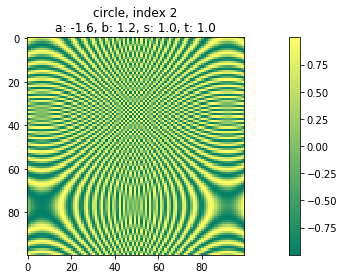

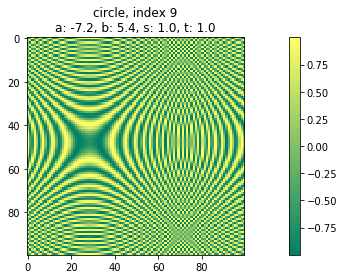

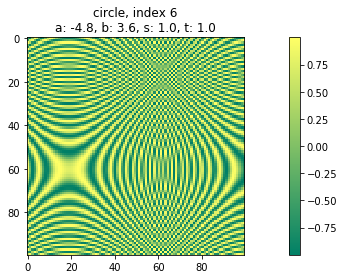

In [28]:
#plot of the in block 4a selected images (df1_red) 

name_df = 'df1_red'
save_plot = True
file = 'Rao Ballart deep'

fig = plot_function(df1_red, name_df, file, save_plot, color = 'summer') 

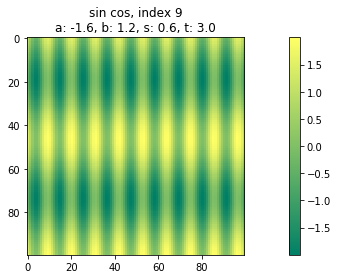

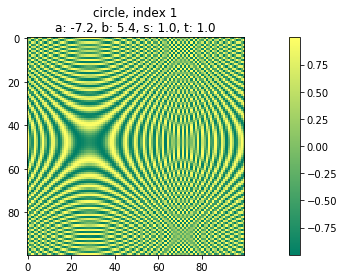

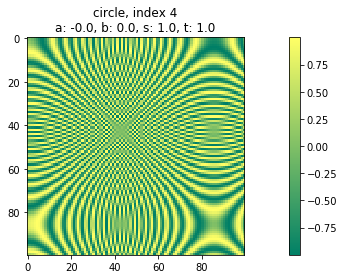

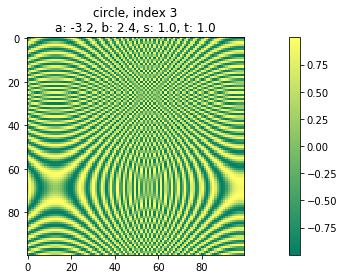

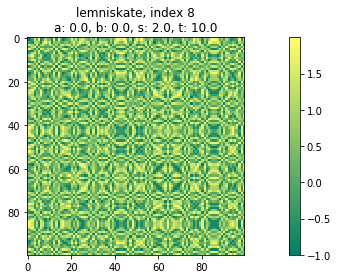

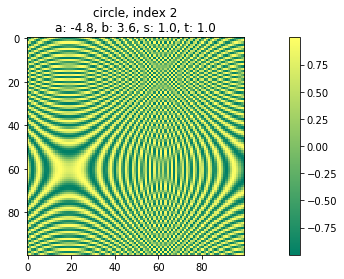

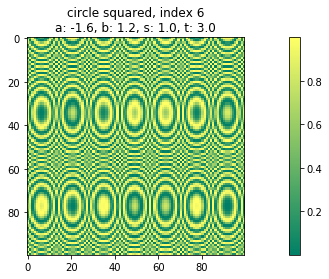

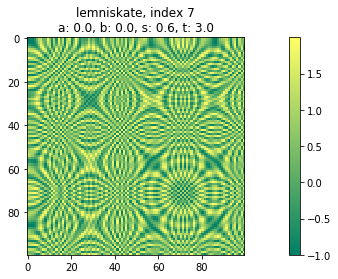

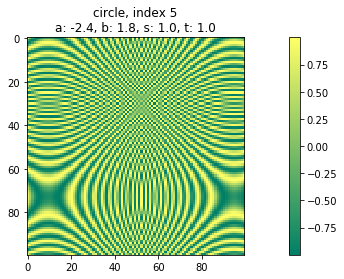

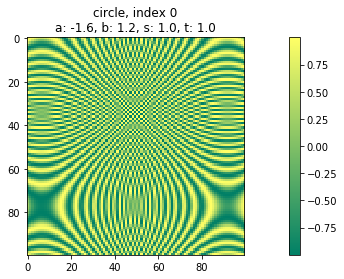

In [84]:
# other example of plot: df_tot_scrambled_fraction, mixed over all four equations, unequal distribution, scrambled

name_df = 'df_tot_scrambled_fraction'
save_plot = True
file = 'Rao Ballart deep'

fig = plot_function(df_tot_scrambled_fraction, name_df, file, save_plot, color = 'summer') 

# Transform the np arrays (images, classes) for Pytorch CNN

In [ ]:
#compare to AI course work
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset) # create your dataloader